                               California Housing society project 

                                         Description

Background of Problem Statement :
The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Domain: Finance and Housing

Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
3. Predict housing prices based on median_income and plot the regression chart for it.

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np

Task.1 Load the data.

In [3]:
#laoding dataset 
data = pd.read_excel("housing.xlsx")
data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100


In [4]:
#Checking data description
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
#Checking types of columns
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

Task 2. Handle missing values. Fill the missing values with the mean of the respective column.

In [6]:
#Checking missing values in dataset for respective columns
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

It can be observed from the above output that,in 5th column ie, total_bedrooms, at 207 rows values are missing

In [7]:
#calculating mean values of column - total_bedroom
mean_total_bedrooms_values = data.total_bedrooms.mean()
mean_total_bedrooms_values

537.8705525375618

In [8]:
#Filling mean value of column - total_bedrooms at missing values and checking data again
data.total_bedrooms.fillna(mean_total_bedrooms_values, inplace = True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

from above output we can see, now there are no missing values in dataset

In [9]:
data.dtypes # ocean_proximity has type object

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

Task.3 Encode categorical data. Convert categorical column in the dataset to numerical data.

In [10]:
# Convert categorical column to numerical ie ocean_proximity
data.ocean_proximity = pd.factorize(data.ocean_proximity)[0] #start form 0

#alternate method
#from sklearn.preprocessing import LabelEncoder
#number = LabelEncoder()
#data['ocean_proximity'] = number.fit_transform(data['ocean_proximity'].astype('str'))

In [11]:
data.dtypes #ocean_proximity type has now changed to numeric

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity         int64
median_house_value      int64
dtype: object

In [12]:
data.ocean_proximity.value_counts() 
# Respective categories are now assigned with numbers starting from 0 in ocean proximity

1    9136
2    6551
3    2658
0    2290
4       5
Name: ocean_proximity, dtype: int64

Task.4 Split the dataset.
Split the data into 80% training dataset and 20% test dataset.

In [14]:
# Extracting input (X) and output (Y) data from the dataset
input_x = data.drop("median_house_value", axis=1)
output_y = data.iloc[:,9:10]

In [15]:
input_x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0


In [16]:
output_y.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


In [17]:
# Split the data into 80% training dataset and 20% test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_x,output_y, test_size = 0.2,#test size 20 %
                                                    random_state = 42)

In [18]:
# shape of train and test sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16512, 9) (4128, 9) (16512, 1) (4128, 1)


Task.5 Standardize data. Standardize training and test datasets.

In [19]:
# Standardizing training and test datasets
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(x_train)
x_train_std = std_scale.transform(x_train)
x_test_std  = std_scale.transform(x_test)

Task.6 Perform Linear Regression.

In [20]:
# Performing Linear Regression
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# Training the model
linear_regression.fit(x_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Predicting output values
y_test_predict = linear_regression.predict(x_test_std)
y_test_predict

array([[ 74987.79670251],
       [164722.48207222],
       [268078.43623126],
       ...,
       [438928.14169585],
       [129292.4078811 ],
       [177122.75454932]])

In [22]:
# Actual values of y test as per dataset
y_test

,median_house_value
20046,47700
3024,45800
15663,500001
20484,218600
9814,278000
...,...
15362,263300
16623,266800
18086,500001
2144,72300


In [23]:
# Checking accuracy of model by using score method to compare values of x and y test dataset
linear_regression.score(x_test_std,y_test)

0.6145634396339879

In [24]:
# Root mean squared error (RMSE) from Linear Regression

#importing metrics library
from sklearn import metrics

metrics.mean_squared_error(y_test, y_test_predict)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))
RMSE

71068.9474556865

Bonus exercise: Perform Linear Regression with one independent variable :

1. Extract just the median_income column from the independent variables (from X_train and X_test).

2. Perform Linear Regression to predict housing values based on median_income.

3. Predict output for test dataset using the fitted model.

4. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [25]:
# Checking independent variable dataset (x_train and x_test)
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33,3126,627.0,2300,623,3.2596,3
8267,-118.16,33.77,49,3382,787.0,1314,756,3.8125,3
17445,-120.48,34.66,4,1897,331.0,915,336,4.1563,3
14265,-117.11,32.69,36,1421,367.0,1418,355,1.9425,3
2271,-119.80,36.78,43,2382,431.0,874,380,3.5542,2


In [26]:
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25,1505,537.870553,1392,359,1.6812,2
3024,-119.46,35.14,30,2943,537.870553,1565,584,2.5313,2
15663,-122.44,37.80,52,3830,537.870553,1310,963,3.4801,0
20484,-118.72,34.28,17,3051,537.870553,1705,495,5.7376,1
9814,-121.93,36.62,34,2351,537.870553,1063,428,3.7250,3


1. Extract just the median_income column from the independent variables (from X_train and X_test).

In [27]:
# Extracting median_income column from x train dataset
x_train_single_variable = x_train.iloc[:,-2:-1]
x_train_single_variable.head()

,median_income
14196,3.2596
8267,3.8125
17445,4.1563
14265,1.9425
2271,3.5542


In [28]:
# Extracting median_income column from x test dataset
x_test_single_variable = x_test.iloc[:,-2:-1]
x_test_single_variable.head()

,median_income
20046,1.6812
3024,2.5313
15663,3.4801
20484,5.7376
9814,3.7250


2. Perform Linear Regression to predict housing values based on median_income.

In [29]:
#Performing Linear Regression to predict housing values based on median_income
linear_regression = LinearRegression()

# Training the model
linear_regression.fit(x_train_single_variable,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3. Predict output for test dataset using the fitted model.

In [30]:
# Predicting output values
y_test_predict_single_variable = linear_regression.predict(x_test_single_variable)
y_test_predict_single_variable

array([[114958.91676996],
       [150606.88213964],
       [190393.71844449],
       ...,
       [431500.77230409],
       [161245.49973085],
       [193412.95560084]])

In [31]:
y_test

,median_house_value
20046,47700
3024,45800
15663,500001
20484,218600
9814,278000
...,...
15362,263300
16623,266800
18086,500001
2144,72300


In [32]:
# Checking accuracy of model by using score method to compare values of x and y test dataset
linear_regression.score(x_test_single_variable,y_test)

0.45885918903846656

In [33]:
# Root mean squared error (RMSE) from Linear Regression
metrics.mean_squared_error(y_test, y_test_predict)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_predict_single_variable))
RMSE

84209.01241414454

4. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

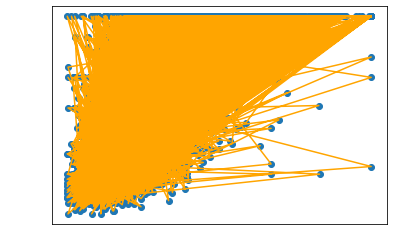

In [34]:
# Ploting the fitted model for training data
import matplotlib.pyplot as plt

plt.scatter(x_train_single_variable,y_train)
plt.plot(x_train_single_variable,y_train,color = 'orange')
plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w')
plt.show()

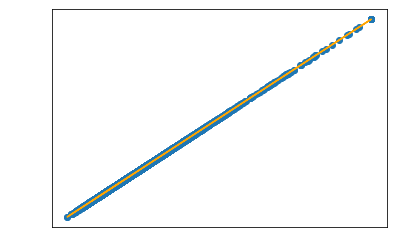

In [35]:
# Ploting the fitted model for test data
import matplotlib.pyplot as plt

plt.scatter(x_test_single_variable,y_test_predict_single_variable)
plt.plot(x_test_single_variable,y_test_predict_single_variable,color = 'orange')
plt.tick_params(axis='x', colors='w')
plt.tick_params(axis='y', colors='w')
plt.show()